In [2]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [3]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [4]:
maind = np.loadtxt('../proxy/GadgetX_DS_main')
maind = maind[loc,1:]

In [5]:
HalfMratio = np.loadtxt('../proxy/Half-mass-radius_ratio')[loc]

<IPython.core.display.Javascript object>


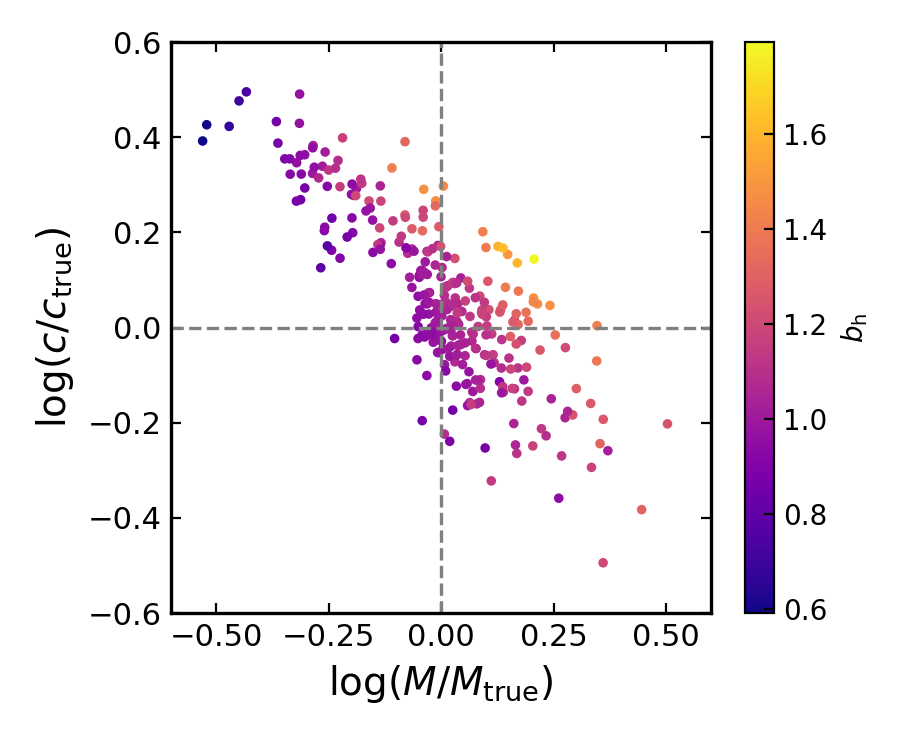

In [7]:
from matplotlib.patches import Patch
import oPDFplus as opd
def main():
    mx = mmtrue[loc]
    cy = cctrue[loc]

    plt.figure(figsize = (4.5,3.7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top = 'on', right = 'on', which='both')
    plt.scatter(np.log10(mx),np.log10(cy),c = HalfMratio, s = 6,
        cmap = 'plasma')
    cbar = plt.colorbar()
    cbar.set_label(r'$b_{\rm h}$')
    
#     def sigplot(loc0,lin):
#         m_m0 = np.log10(mx[loc0])
#         c_c0 = np.log10(cy[loc0])
#         covmc = np.cov(m_m0,c_c0)
#         print("cc is ",covmc[0,1] / covmc[0,0]**0.5  / covmc[1,1]**0.5)
#         xs,ys,zs,siglevel = opd.sigma2dis(m_m0,c_c0,prisig = False)
#         plt.contour(np.log10(xs),np.log10(ys),zs,levels = siglevel,linestyles = [lin],colors = 'k')

#     loc0 = np.where(HalfMratio < 1.0)[0]
#     sigplot(loc0,lin = ':')
#     print(loc0.shape)
#     loc0 = np.where(HalfMratio < 1.4)[0]
#     sigplot(loc0,lin = '--')
#     print(loc0.shape)
#     loc0 = np.where(HalfMratio < 1.6)[0]
#     sigplot(loc0,lin = '-')
#     print(loc0.shape)
    
    plt.tick_params(labelsize = 11)
    plt.axvline(0, color = 'grey', lw = 1.2, ls = '--')
    plt.axhline(0, color = 'grey', lw = 1.2, ls = '--')
    plt.xlim(-0.6,0.6)
    plt.ylim(-0.6,0.6)
    plt.xlabel(r'$\log (M/M_{\rm true})$',fontsize = 14)
    plt.ylabel(r'$\log (c/c_{\rm true})$',fontsize = 14)
    # plt.loglog()

    bwith = 1.2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

#     plt.text(0.15,0.45,'Target', fontweight = 'semibold')

    plt.tight_layout()
    plt.savefig('./figs/b12.pdf')
    plt.show()

main()

In [10]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]

In [11]:
Nsam = 310
indices = np.arange(Nsam)
predt = np.zeros((Nsam))
time = np.zeros(Nsam)
oob = np.zeros(50)
for j in range(50):
    x_train,x_test,y_train,y_test,idx_train,idx_test = train_test_split(HalfMratio.reshape(310,1), target, indices, test_size=0.3, random_state=j)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=j,  oob_score = True)
    forest.fit(x_train, y_train)
    oob[j] = forest.oob_score_
    predt[idx_test] += forest.predict(x_test)
    time[idx_test] += 1
predt = predt / time
print(np.mean(oob))

0.7905302520434766
